<a href="https://colab.research.google.com/github/alauraura/general-jupyter-notebooks/blob/Adidas-Fashion-Retail-Products/AdidasFashionRetailProducts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introdução**
A análise de dados desempenha um papel fundamental no setor de varejo, permitindo identificar padrões de consumo e otimizar estratégias de precificação e marketing. Neste estudo, exploramos um conjunto de dados de produtos da Adidas, com o objetivo de entender melhor as categorias mais vendidas, a variação de preços e a influência dos descontos no engajamento dos consumidores.

Para isso, aplicamos técnicas de análise exploratória de dados (EDA), utilizando visualizações estatísticas para detectar tendências e padrões. Além disso, buscamos responder a perguntas-chave, como:

Quais são as categorias de produtos mais comercializadas?

Como os preços variam entre diferentes tipos de produtos?

Produtos com desconto geram mais engajamento dos clientes?

Existe um "ponto ótimo" de desconto que maximiza a interação dos consumidores?

A partir dessas análises, esperamos fornecer insights que possam ser utilizados para otimizar estratégias de precificação e promoções no mercado de moda esportiva.

**Link do dataset utilizado: https://www.kaggle.com/datasets/thedevastator/adidas-fashion-retail-products-dataset-9300-prod?resource=download**


In [23]:
#importando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [24]:
#carregando dataset
df = pd.read_csv("/content/drive/MyDrive/2025/Estudos/Datasets/adidas/adidas_usa.csv")
df.dtypes

,0
index,int64
url,object
name,object
sku,object
selling_price,int64
original_price,object
currency,object
availability,object
color,object
category,object


**Exploração inicial**

In [25]:
df.info()  # Informações gerais
df.head()  # Ver as primeiras linhas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845 entries, 0 to 844
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           845 non-null    int64  
 1   url             845 non-null    object 
 2   name            845 non-null    object 
 3   sku             845 non-null    object 
 4   selling_price   845 non-null    int64  
 5   original_price  829 non-null    object 
 6   currency        845 non-null    object 
 7   availability    845 non-null    object 
 8   color           845 non-null    object 
 9   category        845 non-null    object 
 10  source          845 non-null    object 
 11  source_website  845 non-null    object 
 12  breadcrumbs     845 non-null    object 
 13  description     845 non-null    object 
 14  brand           845 non-null    object 
 15  images          845 non-null    object 
 16  country         845 non-null    object 
 17  language        845 non-null    obj

,index,url,name,sku,selling_price,original_price,currency,availability,color,category,...,source_website,breadcrumbs,description,brand,images,country,language,average_rating,reviews_count,crawled_at
0,0,https://www.adidas.com/us/beach-shorts/FJ5089....,Beach Shorts,FJ5089,40,NaN,USD,InStock,Black,Clothing,...,https://www.adidas.com,Women/Clothing,Splashing in the surf. Making memories with yo...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.5,35,2021-10-23 17:50:17.331255
1,1,https://www.adidas.com/us/five-ten-kestrel-lac...,Five Ten Kestrel Lace Mountain Bike Shoes,BC0770,150,NaN,USD,InStock,Grey,Shoes,...,https://www.adidas.com,Women/Shoes,Lace up and get after it. The Five Ten Kestrel...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.8,4,2021-10-23 17:50:17.423830
2,2,https://www.adidas.com/us/mexico-away-jersey/G...,Mexico Away Jersey,GC7946,70,NaN,USD,InStock,White,Clothing,...,https://www.adidas.com,Kids/Clothing,"Clean and crisp, this adidas Mexico Away Jerse...",adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.9,42,2021-10-23 17:50:17.530834
3,3,https://www.adidas.com/us/five-ten-hiangle-pro...,Five Ten Hiangle Pro Competition Climbing Shoes,FV4744,160,NaN,USD,InStock,Black,Shoes,...,https://www.adidas.com,Five Ten/Shoes,The Hiangle Pro takes on the classic shape of ...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,3.7,7,2021-10-23 17:50:17.615054
4,4,https://www.adidas.com/us/mesh-broken-stripe-p...,Mesh Broken-Stripe Polo Shirt,GM0239,65,NaN,USD,InStock,Blue,Clothing,...,https://www.adidas.com,Men/Clothing,Step up to the tee relaxed. This adidas golf p...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.7,11,2021-10-23 17:50:17.702680


In [26]:
df.describe()  # Estatísticas básicas

,index,selling_price,average_rating,reviews_count
count,845.000000,845.000000,845.000000,845.000000
mean,422.000000,53.192899,4.608402,426.178698
std,244.074784,31.411645,0.293795,1229.158277
min,0.000000,9.000000,1.000000,1.000000
25%,211.000000,28.000000,4.500000,19.000000
50%,422.000000,48.000000,4.700000,68.000000
75%,633.000000,70.000000,4.800000,314.000000
max,844.000000,240.000000,5.000000,11750.000000


**Tratamento inicial**

In [27]:
df.drop_duplicates(inplace=True) # remover duplicatas
df['category'] = df['category'].str.lower().str.strip() #deixa categorias com letras minúsculas

**Análise Exploratória dos Dados**

<ipython-input-28-8598070b6389>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['category'], order=df['category'].value_counts().index, palette="coolwarm")


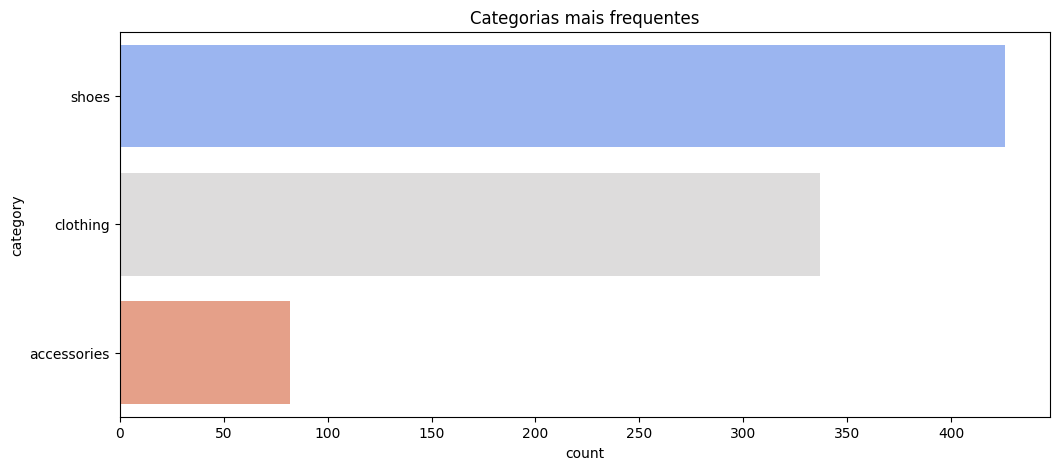

In [28]:
# Distribuição das categorias de produtos:

plt.figure(figsize=(12,5))
sns.countplot(y=df['category'], order=df['category'].value_counts().index, palette="coolwarm")
plt.title("Categorias mais frequentes")
plt.show()

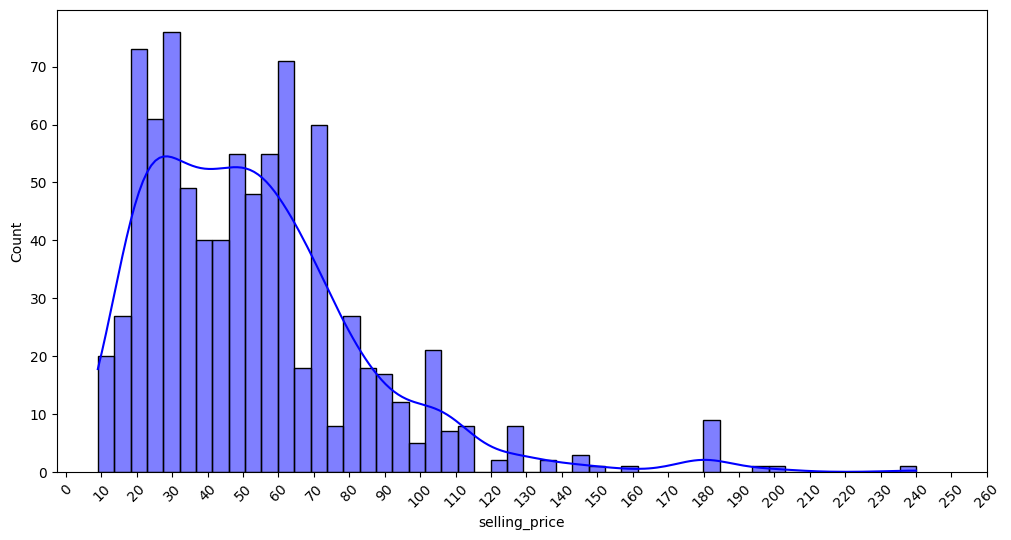

In [29]:
#Distribuição dos preços dos produtos:

# Ajustar o tamanho da figura (exemplo: 12 de largura e 6 de altura)
plt.figure(figsize=(12, 6))

# Criando o histograma
ax = sns.histplot(df['selling_price'], bins=50, kde=True, color='blue')

# Definir os ticks do eixo X de 10 em 10, começando do 0 até o valor máximo
xmin, xmax = ax.get_xlim()  # Obtém os limites do eixo X
xticks = np.arange(0, xmax + 10, 10)  # Gera os valores de 10 em 10

plt.xticks(xticks, rotation=45)  # Define os novos ticks e rotaciona para evitar sobreposição
plt.show()

**Podemmos ver que a maioria dos produtos, no geral, possuem preço de 20 USD a 65 USD.**

**Embora a maioria dos produtos esteja nesse intervalo, há um conjunto de outliers interessante de produtos entre 180 USB e 185 USB.**



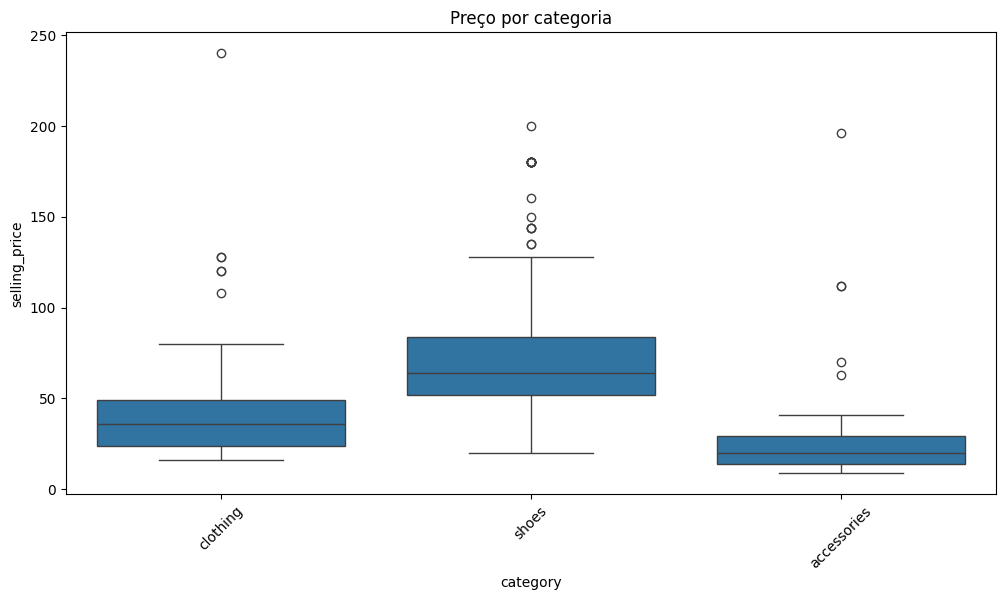

In [30]:
#Variação de preço por categoria:

plt.figure(figsize=(12,6))
sns.boxplot(x='category', y='selling_price', data=df)
plt.xticks(rotation=45)
plt.title("Preço por categoria")
plt.show()

**Os sapatos tendem a ter um preço maior do que roupas e acessórios. Essa categoria possui mais outliers e maior variação de valores, o que faz sentido por ter uma quantidade maior disponível.**

**Os valores dos acessórios são menos variados, são abaixo de 50 USD.**

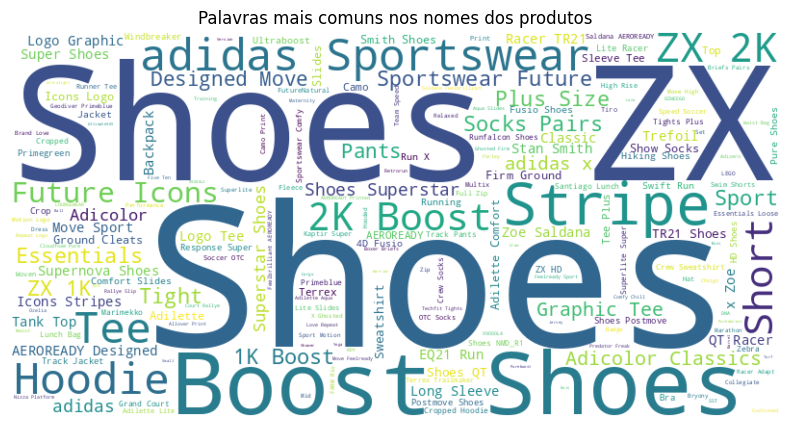

In [31]:
#Palavras mais usadas nos nomes dos produtos:

from collections import Counter
from wordcloud import WordCloud

words = " ".join(df['name'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Palavras mais comuns nos nomes dos produtos")
plt.show()

**Vamos uma quantidade maior do sapatos "Shoes ZX" e "Boost Shoes". No momento da coleta dos dados, eram as linhas que com mais produtos no site.
No quesito de roupas, vemos "Hoodie" e "Tee" se destacando.**

**Uma palavra que aparece muito também é "Stripe", o que faz sentido, já que a três listras fazem parte do visual da marca.**

### **RELAÇÃO DO DESCONTO COM O NÚMERO DE AVALIAÇÕES**

OBSERVAÇÃO: Inicialmente, a inteção era relacionar o desconto com o número de vendas. Como não temos acesso a esse dado, nos basearemos na quantidade de avaliações, já que esses dados são proporcionais na maioria dos casos.
Essa relação não necessariamente existe, mas busquei investigá-la com propósito didático para entender melhor as bibliotecas.

Perguntas a responder:
*   Produtos com desconto recebem mais avaliações?
*   Quanto maior o desconto, maior o número de avaliações?
*   Existe um "ponto ótimo" de desconto que gera mais engajamento?

In [32]:
# Passo 1: Limpar a coluna 'original_price' (remover caracteres não numéricos) e convertê-la para float
df['original_price'] = df['original_price'].replace('[^\d.]', '', regex=True).astype(float)

# Passo 2: Preencher NaN em 'original_price' com os valores de 'selling_price'
df['original_price'] = df['original_price'].fillna(df['selling_price'])

# Passo 3: Calcular a coluna de desconto (%)
df['discount_%'] = ((df['original_price'] - df['selling_price']) / df['original_price']) * 100

# Passo 4: Garantir que valores negativos ou nulos no desconto sejam tratados
df['discount_%'] = df['discount_%'].fillna(0).clip(lower=0)


<ipython-input-39-700ed66b17ef>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='discount_category', y='reviews_count', data=df, palette="coolwarm", showfliers=False)


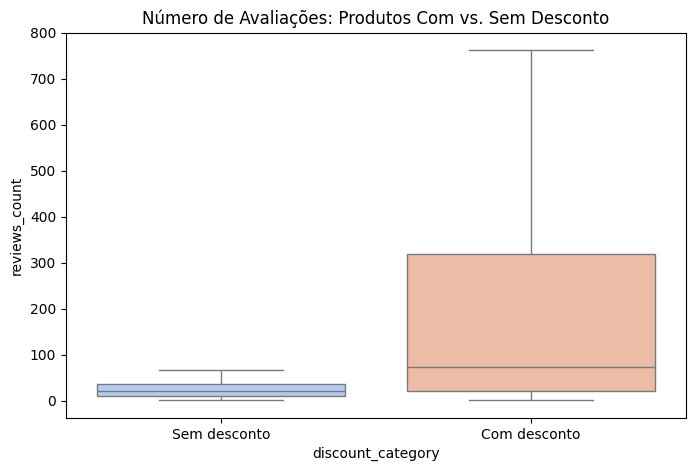

In [39]:
# Criar uma coluna categórica para "Com desconto" e "Sem desconto"
df['discount_category'] = df['discount_%'].apply(lambda x: 'Com desconto' if x > 0 else 'Sem desconto')

# Visualização com boxplot, sem os outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x='discount_category', y='reviews_count', data=df, palette="coolwarm", showfliers=False)
plt.title("Número de Avaliações: Produtos Com vs. Sem Desconto")
plt.show()


#print(df['discount_category'].head(20))

**Produtos com desconto recebem cerca de 8 vezes mais avaliações / recebem mais pedidos**

<ipython-input-48-af4d5ea5c6da>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_reviews = df.groupby('discount_range')['reviews_count'].sum().reset_index()
<ipython-input-48-af4d5ea5c6da>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='discount_range', y='reviews_count', data=total_reviews, palette="coolwarm")


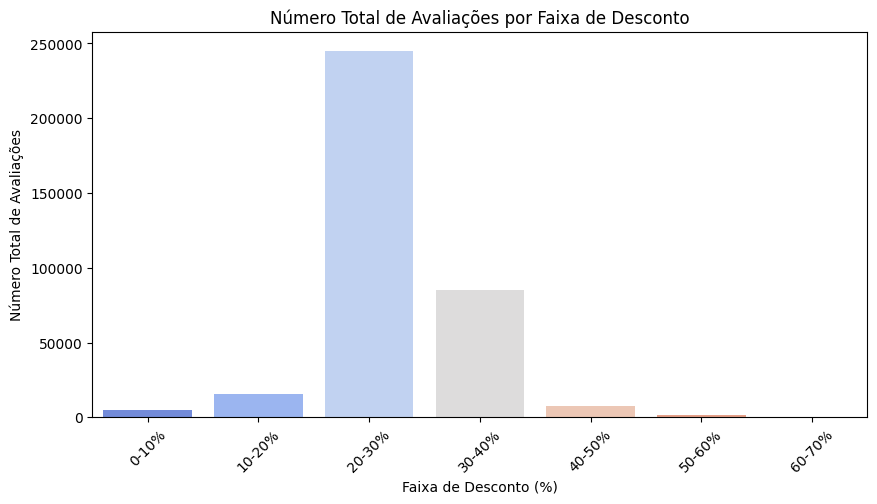

In [48]:
# Definir os intervalos de desconto
bins = [0, 10, 20, 30, 40, 50, 60, 70]  # Faixas de desconto
labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%']  # Rótulos para as faixas
df['discount_range'] = pd.cut(df['discount_%'], bins=bins, labels=labels, right=False)

# Calcular o número total de avaliações por faixa de desconto
total_reviews = df.groupby('discount_range')['reviews_count'].sum().reset_index()

# Visualização com gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x='discount_range', y='reviews_count', data=total_reviews, palette="coolwarm")

plt.title("Número Total de Avaliações por Faixa de Desconto")
plt.xlabel("Faixa de Desconto (%)")
plt.ylabel("Número Total de Avaliações")
plt.xticks(rotation=45)  # Rotacionar rótulos do eixo X para melhor leitura
plt.show()

A maioria dos produtos possuem desconto entre 25% e 30%

<ipython-input-35-dceb1c960023>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(x=df.groupby('discount_bin')['reviews_count'].mean().index, y=df.groupby('discount_bin')['reviews_count'].mean(), palette="coolwarm")
<ipython-input-35-dceb1c960023>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.groupby('discount_bin')['reviews_count'].mean().index, y=df.groupby('discount_bin')['reviews_count'].mean(), palette="coolwarm")


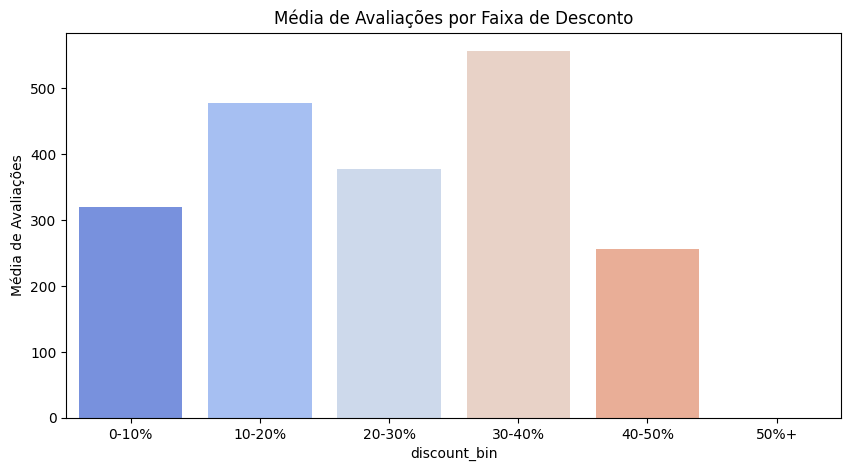

In [35]:
# Encontrando o ponto ótimo do desconto

df['discount_bin'] = pd.cut(df['discount_%'], bins=[0, 10, 20, 30, 40, 50, 100], labels=["0-10%", "10-20%", "20-30%", "30-40%", "40-50%", "50%+"])

plt.figure(figsize=(10,5))
sns.barplot(x=df.groupby('discount_bin')['reviews_count'].mean().index, y=df.groupby('discount_bin')['reviews_count'].mean(), palette="coolwarm")
plt.title("Média de Avaliações por Faixa de Desconto")
plt.ylabel("Média de Avaliações")
plt.show()

**Embora a maioria dos produtos tenham desconto entre 20% e 30%, há uma maior venda/ engajamento em produtos com desconto entre 30% e 40%, ainda mais do que descontos maiores.**

## **Conclusão**

Nesta análise, exploramos os padrões nos produtos da Adidas, com foco nas categorias mais vendidas, variação de preços e a relação entre descontos e engajamento dos consumidores.

Principais descobertas:
* A maioria dos produtos possui preços entre 20 e 65 USD, com um grupo de outliers na faixa de 180 a 185 USD.

* Sapatos tendem a ter preços mais elevados e maior variação de valores, enquanto acessórios são mais acessíveis, ficando abaixo dos 50 USD.

* Termos como "Shoes ZX", "Boost Shoes", "Hoodie" e "Tee" aparecem com frequência nos nomes dos produtos, indicando as linhas mais populares no momento da coleta dos dados.

Descontos e Engajamento:

* Produtos com desconto tendem a receber cerca de 8 vezes mais avaliações do que aqueles sem desconto.

* A maioria dos produtos tem um desconto entre 25% e 30%, mas o maior engajamento ocorre na faixa de 30% a 40%.

* Descontos superiores a 40% não necessariamente aumentam o número de avaliações, sugerindo um possível ponto ótimo para maximizar vendas e engajamento.


**Reflexões finais:**

Os insights obtidos podem ajudar na definição de estratégias de precificação e promoção para maximizar o impacto das vendas. A relação entre descontos e engajamento reforça a importância de definir faixas de desconto estratégicas para incentivar o consumo sem comprometer a margem de lucro.

Futuros estudos poderiam incluir dados de vendas reais para validar melhor a relação entre descontos e desempenho dos produtos.

